# SIFT

In [3]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

from utils import *

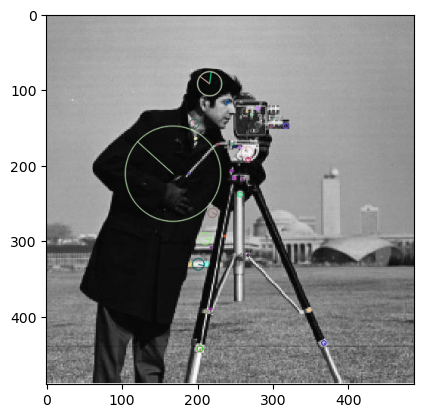

In [4]:
image = cv2.imread('data/images/cameraman.png', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create(nfeatures = 50)
kp, des = sift.detectAndCompute(image, None)

img = cv2.drawKeypoints(image,kp, -1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

## Keypoint and Descriptor Characteristics

In [5]:
# kp --> prints an array of keypoints
# kp[0] --> prints cv2.KeyPoint #######
print('Angle = ', kp[0].angle)              # angle of the point
print('Coordinates = ', kp[0].pt)           # coordinates of the keypoint
print('Octave = ', kp[0].octave)            # which octave is this point from
print('Diameter = ', kp[0].size)            # diameter of the meaningful keypoint neighborhood
print('Response = ', kp[0].response)        # response by which the most strong keypoints have been selected

Angle =  25.95208740234375
Coordinates =  (245.61419677734375, 207.17758178710938)
Octave =  13435903
Diameter =  3.433577060699463
Response =  0.08546505123376846


In [6]:
print(des[0].shape)                         # shape of the descriptor (dimension of each feature)
des

(128,)


array([[ 3., 47., 53., ..., 44., 13., 21.],
       [ 0.,  0.,  1., ...,  0.,  1.,  2.],
       [ 9.,  4., 13., ...,  1.,  0.,  0.],
       ...,
       [10.,  4.,  0., ...,  0., 55., 25.],
       [19.,  1.,  0., ...,  0.,  2.,  6.],
       [26.,  0.,  1., ...,  4.,  0.,  0.]], dtype=float32)

# SIFT Feature Matching

In [7]:
def plot_matches(matches, total_img):
    match_img = total_img.copy()
    offset = total_img.shape[1]/2
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(np.array(match_img).astype('uint8')) #　RGB is integer type

    ax.plot(matches[:, 0], matches[:, 1], 'xr')
    ax.plot(matches[:, 2] + offset, matches[:, 3], 'xr')

    ax.plot([matches[:, 0], matches[:, 2] + offset], [matches[:, 1], matches[:, 3]],
            'r', linewidth=0.5)

    plt.show()

In [8]:
image1 = cv2.imread('data/images/cartoon1.pgm')
image2 = cv2.imread('data/images/cartoon2.pgm')

orb = cv2.ORB_create(nfeatures = 50)

kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)

bf = cv2.BFMatcher()

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x: x.distance)
matches   #1D array of matches


[< cv2.DMatch 000001B20057A930>,
 < cv2.DMatch 000001B20057A950>,
 < cv2.DMatch 000001B20057A6F0>,
 < cv2.DMatch 000001B20057A990>,
 < cv2.DMatch 000001B20057A970>,
 < cv2.DMatch 000001B20057AA70>,
 < cv2.DMatch 000001B20057AB10>,
 < cv2.DMatch 000001B20057AA90>,
 < cv2.DMatch 000001B200495190>,
 < cv2.DMatch 000001B20057A8D0>,
 < cv2.DMatch 000001B20057A9B0>,
 < cv2.DMatch 000001B20057AAD0>,
 < cv2.DMatch 000001B2001F31B0>,
 < cv2.DMatch 000001B20057A9F0>,
 < cv2.DMatch 000001B20057AB90>,
 < cv2.DMatch 000001B20057AB30>,
 < cv2.DMatch 000001B20057A9D0>,
 < cv2.DMatch 000001B200579030>,
 < cv2.DMatch 000001B20057A8F0>,
 < cv2.DMatch 000001B20057A610>,
 < cv2.DMatch 000001B20057A750>,
 < cv2.DMatch 000001B20057A8B0>,
 < cv2.DMatch 000001B2004E32F0>,
 < cv2.DMatch 000001B200578750>,
 < cv2.DMatch 000001B20057AC30>,
 < cv2.DMatch 000001B20057A910>,
 < cv2.DMatch 000001B20057AA50>,
 < cv2.DMatch 000001B20057ABB0>,
 < cv2.DMatch 000001B20057AB70>,
 < cv2.DMatch 000001B20057AC10>,
 < cv2.DMa

In [9]:
print('Distance = ',matches[0].distance)                    # Distance between descriptors
print('Train image index = ', matches[0].imgIdx)
print('Query Descriptor Index = ', matches[0].queryIdx)
print('Train Descriptor Index = ', matches[0].trainIdx)

Distance =  70.08566284179688
Train image index =  0
Query Descriptor Index =  21
Train Descriptor Index =  13


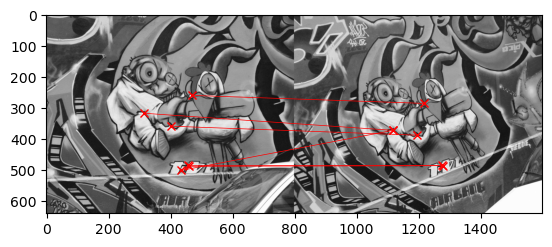

In [10]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
matches     #2D array of matches

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

source = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,2)
dst = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,2)

output = np.hstack([source, dst])
total_image = np.hstack([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB),cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)])
plot_matches(output, total_image)

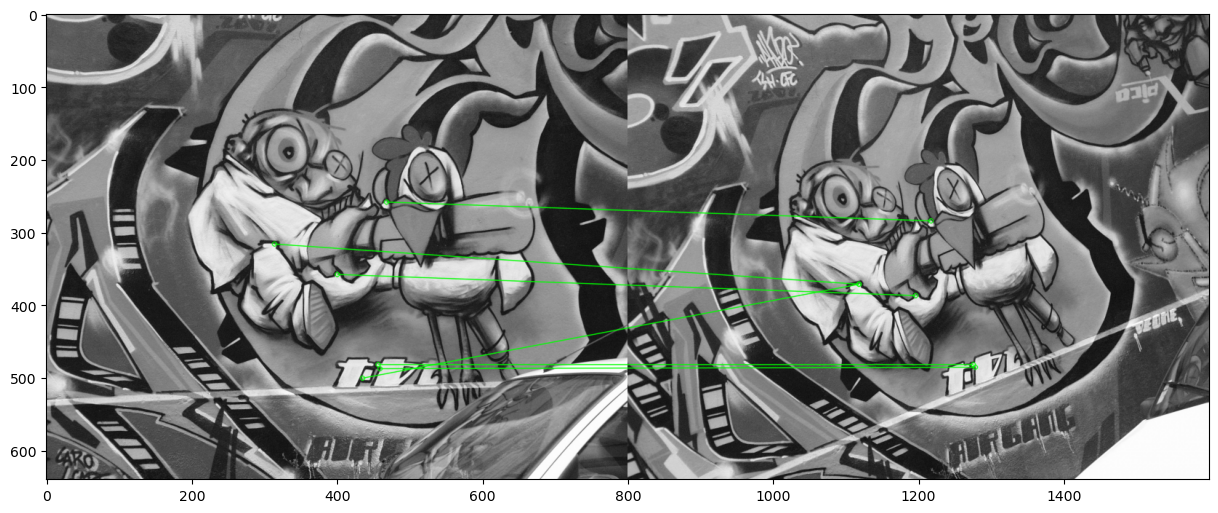

(<matplotlib.image.AxesImage at 0x1b203b32210>, None)

In [11]:
H, mask = cv2.findHomography(source, dst)
# H, mask = cv2.findHomography(source, dst, cv2.RANSAC, ransacReprojThreshold=5)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = mask.ravel().tolist(), # draw only inliers
                   flags = 2)
plt.figure(figsize=(15,15))
output_image = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(output_image, 'gray'),plt.show()

# Transformations

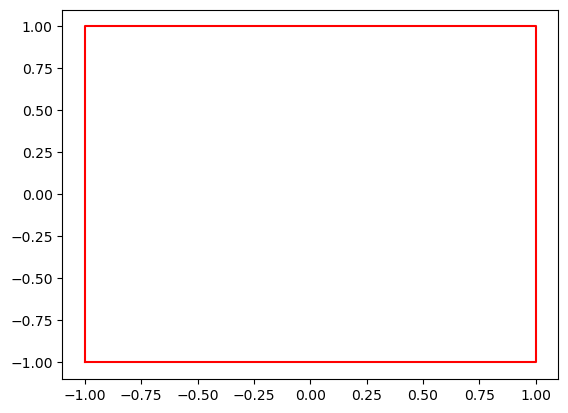

In [12]:
import numpy as np
import matplotlib.pyplot as plt

original_pts = np.array([[-1, -1], [1,-1], [1,1], [-1, 1], [-1, -1]])

plt.plot(original_pts[:,0], original_pts[:,1], color='r')

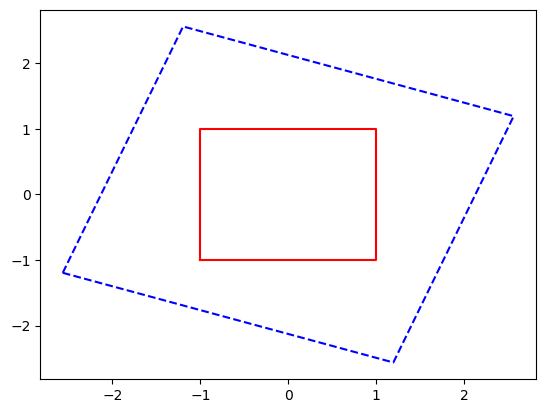

In [13]:
scale_factor = 2
translation_vector = np.array([2,3])
rotation_angle = 20

scale_matrix = np.array([[scale_factor, 0, 0],[0, scale_factor, 0],[0,0,1]])

rotation_angle_rad = np.radians(rotation_angle)
rotation_matrix = np.array([[np.cos(rotation_angle_rad), -np.sin(rotation_angle_rad), 0],
                            [np.sin(rotation_angle_rad), np.cos(rotation_angle_rad), 0],
                            [0, 0, 1]])

translation_matrix = np.array([[1, 0, translation_vector[0]],
                               [0, 1, translation_vector[1]],
                               [0,0,1]])

H = np.dot(scale_matrix,np.dot(rotation_matrix, translation_matrix))

original = np.column_stack((original_pts, np.ones(original_pts.shape[0])))

new_pts = np.dot(original, H)

plt.plot(original_pts[:,0], original_pts[:,1], color='r')
plt.plot(new_pts[:,0], new_pts[:,1], color='b', linestyle='dashed')

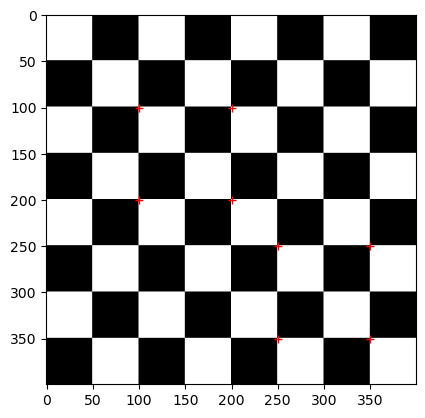

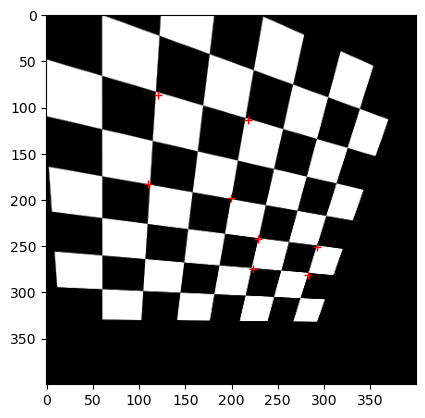

In [14]:
image1 = cv2.imread('data/images/checkerboard1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('data/images/checkerboard2.png', cv2.IMREAD_GRAYSCALE)

pts1 = np.array([[100, 100],[100, 200], [200, 100], [200,200], 
                 [250, 250],[250, 350], [350, 250], [350,350]]).T
pts2 = np.array([(120, 86), (218, 114), (110, 183), (199, 198),
                (229, 242), (292, 251), (223, 275), (283, 281)]).T

plt.imshow(image1, cmap='gray')
plt.plot(pts1[0,:], pts1[1,:],'r+')
plt.show()
plt.imshow(image2, cmap='gray')
plt.plot(pts2[0,:], pts2[1,:],'r+')

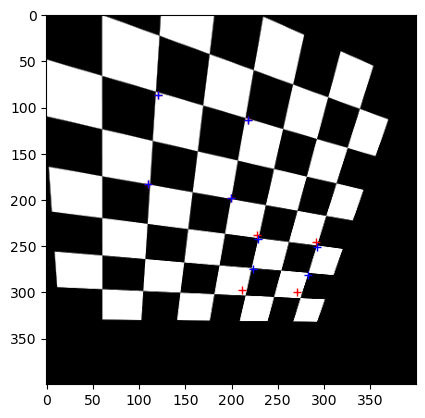

In [46]:
H = cv2.getPerspectiveTransform(np.float32(pts1[:,:4]).T, np.float32(pts2[:,:4]).T)

new = cv2.perspectiveTransform(pts1.T.reshape(-1,1,2).astype(np.float32), H)

plt.imshow(image2, cmap='gray')
plt.plot(new[:,:,0], new[:,:,1],'r+')
plt.plot(pts2[0,:], pts2[1,:],'b+')
plt.show()

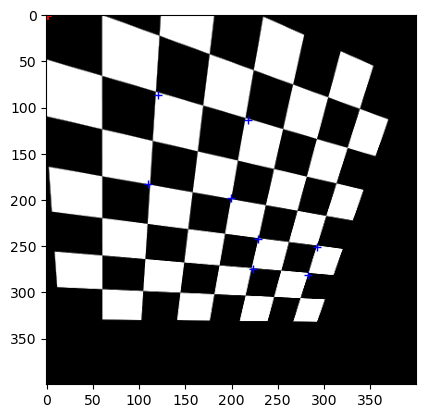

In [50]:
new2 = cv2.warpPerspective(pts1.T.reshape(-1,1,2).astype(np.float32), H, (pts1.shape[1], pts1.shape[0]))

plt.imshow(image2, cmap='gray')
plt.plot(new2[:,:,0], new2[:,:,1],'r+')
plt.plot(pts2[0,:], pts2[1,:],'b+')
plt.show()